In [62]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [63]:
df = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')

In [64]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [65]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [66]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [67]:
df['SeniorCitizen'] = df['SeniorCitizen'].map({0:'No',1:'Yes'})

In [68]:
cut_labels = ['0-12', '13-24', '25-36', '37-48','49-60','61-72']
cut_bins = [0, 12,24,36,48,60,72]
df['Tenure Period'] = pd.cut(df['tenure'],bins=cut_bins, labels=cut_labels)
df['Tenure Period'].value_counts()

Tenure Period
0-12     2175
61-72    1407
13-24    1024
25-36     832
49-60     832
37-48     762
Name: count, dtype: int64

In [69]:
#Binning the MonthlyCharges column
cut_labels = ['0-20', '21-40', '41-60', '61-80','81-100','101-120']
cut_bins = [0, 20,40,60,80,100,120]
df['MonthlyCharges_Range'] =pd.cut(df['MonthlyCharges'], bins=cut_bins,labels=cut_labels)
df['MonthlyCharges_Range'].value_counts()

MonthlyCharges_Range
81-100     1764
61-80      1459
21-40      1182
41-60      1080
101-120     902
0-20        656
Name: count, dtype: int64

In [70]:
df['TotalCharges'] =pd.to_numeric(df['TotalCharges'],errors='coerce')
df['TotalCharges'].describe()

count    7032.000000
mean     2283.300441
std      2266.771362
min        18.800000
25%       401.450000
50%      1397.475000
75%      3794.737500
max      8684.800000
Name: TotalCharges, dtype: float64

In [71]:
#Binning the total charges column
cut_labels = ['0-1000', '1001-2000','2001-4000','4001-6000','6001-8000','8001-10000']
cut_bins = [0, 1000,2000,4000,6000,8000,10000]
df['TotalCharges_Range'] =pd.cut(df['TotalCharges'], bins=cut_bins,labels=cut_labels)
df['TotalCharges_Range'].value_counts()

TotalCharges_Range
0-1000        2893
1001-2000     1283
2001-4000     1208
4001-6000      956
6001-8000      614
8001-10000      78
Name: count, dtype: int64

In [72]:
# Dropping colummns that are not required
cols_to_drop =['customerID','MonthlyCharges','tenure','TotalCharges']
df.drop(labels=cols_to_drop,axis=1,inplace=True)

# Sanity checks
df.head(4)

,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Churn,Tenure Period,MonthlyCharges_Range,TotalCharges_Range
0,Female,No,Yes,No,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,No,0-12,21-40,0-1000
1,Male,No,No,No,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,No,25-36,41-60,1001-2000
2,Male,No,No,No,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,Yes,0-12,41-60,0-1000
3,Male,No,No,No,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),No,37-48,41-60,1001-2000


In [73]:
# Checking count of null values by the columns
df.isna().sum()

gender                   0
SeniorCitizen            0
Partner                  0
Dependents               0
PhoneService             0
MultipleLines            0
InternetService          0
OnlineSecurity           0
OnlineBackup             0
DeviceProtection         0
TechSupport              0
StreamingTV              0
StreamingMovies          0
Contract                 0
PaperlessBilling         0
PaymentMethod            0
Churn                    0
Tenure Period           11
MonthlyCharges_Range     0
TotalCharges_Range      11
dtype: int64

In [74]:
# Missing values imputation
df['TotalCharges_Range'].fillna(df['TotalCharges_Range'].mode()[0], inplace=True)
df['Tenure Period'].fillna(df['Tenure Period'].mode()[0], inplace=True)

In [75]:
#Label Encoding
# Importing LabelEncoder
from sklearn.preprocessing import LabelEncoder

# Instantiating LabelEncoder
le=LabelEncoder()

# Iterating over all the values of each column and extract their dtypes
for col in df.columns.to_numpy():
    # Comparing if the dtype is object
    if df[col].dtypes in ('object','category'):
    # Using LabelEncoder to do the numeric transformation
        df[col]=le.fit_transform(df[col].astype(str))

In [76]:
# Sanity Check
df.head()

,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Churn,Tenure Period,MonthlyCharges_Range,TotalCharges_Range
0,0,0,1,0,0,1,0,0,2,0,0,0,0,0,1,2,0,0,2,0
1,1,0,0,0,1,0,0,2,0,2,0,0,0,1,0,3,0,2,3,1
2,1,0,0,0,1,0,0,2,2,0,0,0,0,0,1,3,1,0,3,0
3,1,0,0,0,0,1,0,2,0,2,2,0,0,1,0,0,0,3,3,1
4,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,2,1,0,4,0


In [77]:
# Putting feature variable to X
X = df.drop('Churn',axis=1)

# Putting response variable to y
y = df['Churn']

In [78]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, train_size=0.7, random_state=42)
X_train.shape, X_test.shape

((4930, 19), (2113, 19))

In [79]:
#Model Building
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(max_depth=3,random_state=43)
dt.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3, random_state=43)

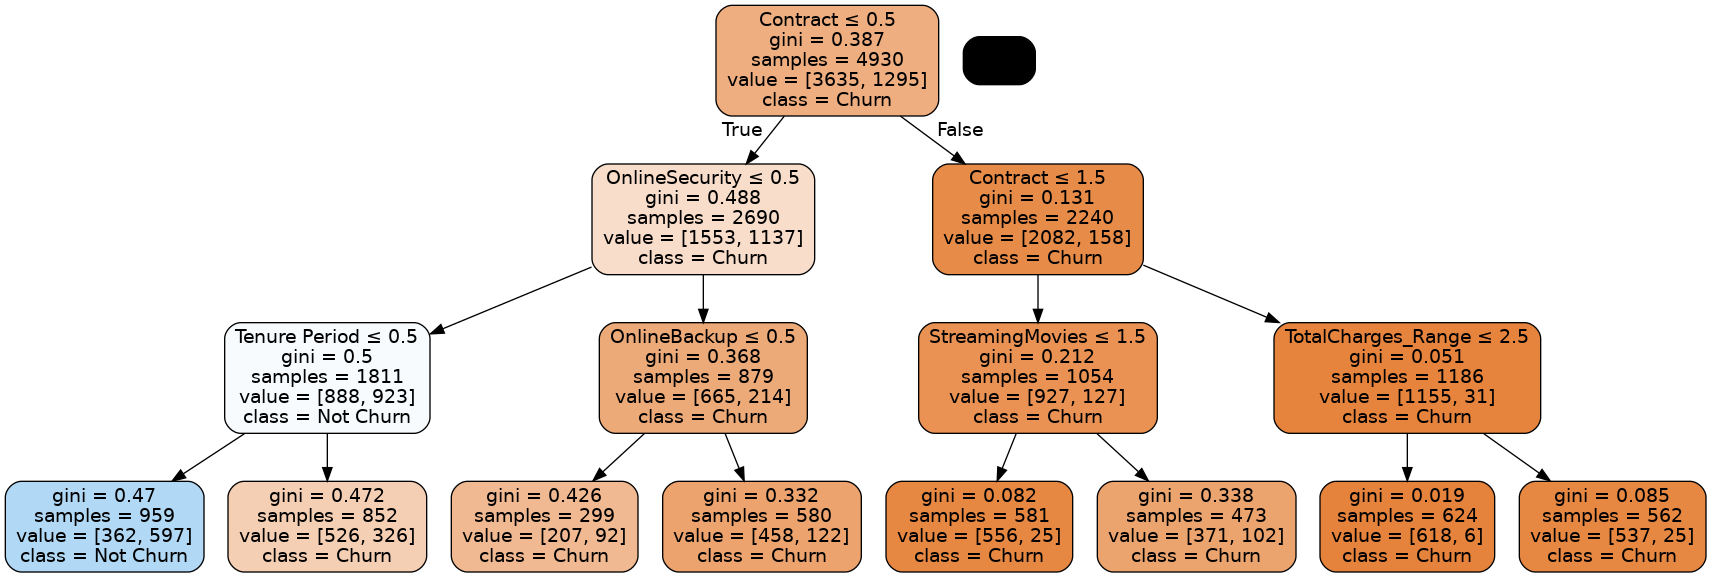

In [80]:
from sklearn.tree import export_graphviz
from six import StringIO
from IPython.display import Image
import pydotplus

dot_data = StringIO()
export_graphviz(dt, out_file=dot_data,filled=True, rounded=True, special_characters=True,feature_names = X.columns,class_names=['Churn',"Not Churn"])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write_png('Churn.png')
Image(graph.create_png())

In [81]:
#Model Evaluation
from sklearn.metrics import confusion_matrix,accuracy_score

In [82]:
#Let's build a tree to it's full depth
dt = DecisionTreeClassifier(random_state=43)
dt.fit(X_train,y_train)

DecisionTreeClassifier(random_state=43)

In [83]:
y_train_pred = dt.predict(X_train)
y_test_pred = dt.predict(X_test)

In [84]:
print(accuracy_score(y_train, y_train_pred))
confusion_matrix(y_train, y_train_pred)

0.959026369168357


array([[3593,   42],
       [ 160, 1135]])

In [85]:
print(accuracy_score(y_test, y_test_pred))
confusion_matrix(y_test, y_test_pred)

0.7188831045906294


array([[1262,  277],
       [ 317,  257]])

In [86]:
# Let's check the overall accuracy.
trainaccuracy= accuracy_score(y_train, y_train_pred)
testaccuracy= accuracy_score(y_test, y_test_pred)

confusion_TRN = confusion_matrix(y_train,y_train_pred)
confusion_TST = confusion_matrix(y_test,y_test_pred)

In [87]:
TP = confusion_TRN[1,1] # true positive
TN = confusion_TRN[0,0] # true negatives
FP = confusion_TRN[0,1] # false positives
FN = confusion_TRN[1,0] # false negatives

In [88]:
TP_TST = confusion_TST[1,1] # true positive
TN_TST = confusion_TST[0,0] # true negatives
FP_TST = confusion_TST[0,1] # false positives
FN_TST = confusion_TST[1,0] # false negatives

In [89]:
trainsensitivity= TP / float(TP+FN)
trainspecificity= TN / float(TN+FP)

testsensitivity= TP_TST / float(TP_TST+FN_TST)
testspecificity= TN_TST / float(TN_TST+FP_TST)

In [90]:
# Let us compare the values obtained for Train & Test:
print('-'*30)
print('On Train Data')
print('-'*30)
print("Accuracy : {} %".format(round((trainaccuracy*100),2)))
print("Sensitivity : {} %".format(round((trainsensitivity*100),2)))
print("Specificity : {} %".format(round((trainspecificity*100),2)))
print('-'*30)
print('On Test Data')
print('-'*30)
print("Accuracy : {} %".format(round((trainaccuracy*100),2)))
print("Sensitivity : {} %".format(round((testsensitivity*100),2)))
print("Specificity : {} %".format(round((testspecificity*100),2)))
print('-'*30)

------------------------------
On Train Data
------------------------------
Accuracy : 95.9 %
Sensitivity : 87.64 %
Specificity : 98.84 %
------------------------------
On Test Data
------------------------------
Accuracy : 95.9 %
Sensitivity : 44.77 %
Specificity : 82.0 %
------------------------------


In [91]:
#Hyper Parameter Tuning
from sklearn.model_selection import GridSearchCV

dt_hp = DecisionTreeClassifier(random_state=43)

In [92]:
params = {'max_depth':[3,5,7,10],'min_samples_leaf':[5,10,15,20],'min_samples_split':[10,12,18,20],'criterion':['gini','entropy']}

In [93]:
GS = GridSearchCV(estimator=dt_hp,param_grid=params,cv=5,n_jobs=-1, verbose=True,scoring='accuracy')

In [94]:
GS.fit(X_train,y_train)
print('Best Parameters:',GS.best_params_,end='\n\n')
print('Best Score:',GS.best_score_)

Fitting 5 folds for each of 128 candidates, totalling 640 fits
Best Parameters: {'criterion': 'entropy', 'max_depth': 7, 'min_samples_leaf': 20, 'min_samples_split': 10}

Best Score: 0.7926977687626774


In [95]:
dt_hp = DecisionTreeClassifier(max_depth=9,min_samples_leaf= 25,min_samples_split=5 ,random_state=43)

In [96]:
dt_hp.fit(X_train, y_train)
y_train_pred = dt_hp.predict(X_train)
y_test_pred = dt_hp.predict(X_test)

In [97]:
# Let's check the overall accuracy.
trainaccuracy= accuracy_score(y_train,y_train_pred)
testaccuracy= accuracy_score(y_test,y_test_pred)

In [98]:
confusion_TRN = confusion_matrix(y_train,y_train_pred)
confusion_TST = confusion_matrix(y_test,y_test_pred)

In [99]:
TP = confusion_TRN[1,1] # true positive
TN = confusion_TRN[0,0] # true negatives
FP = confusion_TRN[0,1] # false positives
FN = confusion_TRN[1,0] # false negatives

In [100]:
TP_TST = confusion_TST[1,1] # true positive
TN_TST = confusion_TST[0,0] # true negatives
FP_TST = confusion_TST[0,1] # false positives
FN_TST = confusion_TST[1,0] # false negatives

In [101]:
trainsensitivity= TP / float(TP+FN)
trainspecificity= TN / float(TN+FP)
testsensitivity= TP_TST / float(TP_TST+FN_TST)
testspecificity= TN_TST / float(TN_TST+FP_TST)

In [102]:
# Let us compare the values obtained for Train & Test:
print('-'*30)
print('On Train Data')
print('-'*30)
print("Accuracy : {} %".format(round((trainaccuracy*100),2)))
print("Sensitivity : {} %".format(round((trainsensitivity*100),2)))
print("Specificity : {} %".format(round((trainspecificity*100),2)))
print('-'*30)
print('On Test Data')
print('-'*30)
print("Accuracy : {} %".format(round((trainaccuracy*100),2)))
print("Sensitivity : {} %".format(round((testsensitivity*100),2)))
print("Specificity : {} %".format(round((testspecificity*100),2)))
print('-'*30)

------------------------------
On Train Data
------------------------------
Accuracy : 80.91 %
Sensitivity : 56.6 %
Specificity : 89.57 %
------------------------------
On Test Data
------------------------------
Accuracy : 80.91 %
Sensitivity : 50.87 %
Specificity : 88.76 %
------------------------------


In [103]:
#Feature Importance
# let's create a dictionary of features and their importance values
feat_dict= {}
for col, val in sorted(zip(X_train.columns,dt_hp.feature_importances_),key=lambda x:x[1],reverse=True):
    feat_dict[col]=val

In [104]:
feat_df = pd.DataFrame({'Feature':feat_dict.keys(),'Importance':feat_dict.values()})

feat_df

,Feature,Importance
0,Contract,0.489479
1,OnlineSecurity,0.137452
2,Tenure Period,0.106759
3,InternetService,0.084862
4,PaymentMethod,0.029613
5,StreamingMovies,0.027684
6,StreamingTV,0.023474
7,PaperlessBilling,0.015434
8,OnlineBackup,0.015273
9,MonthlyCharges_Range,0.014312


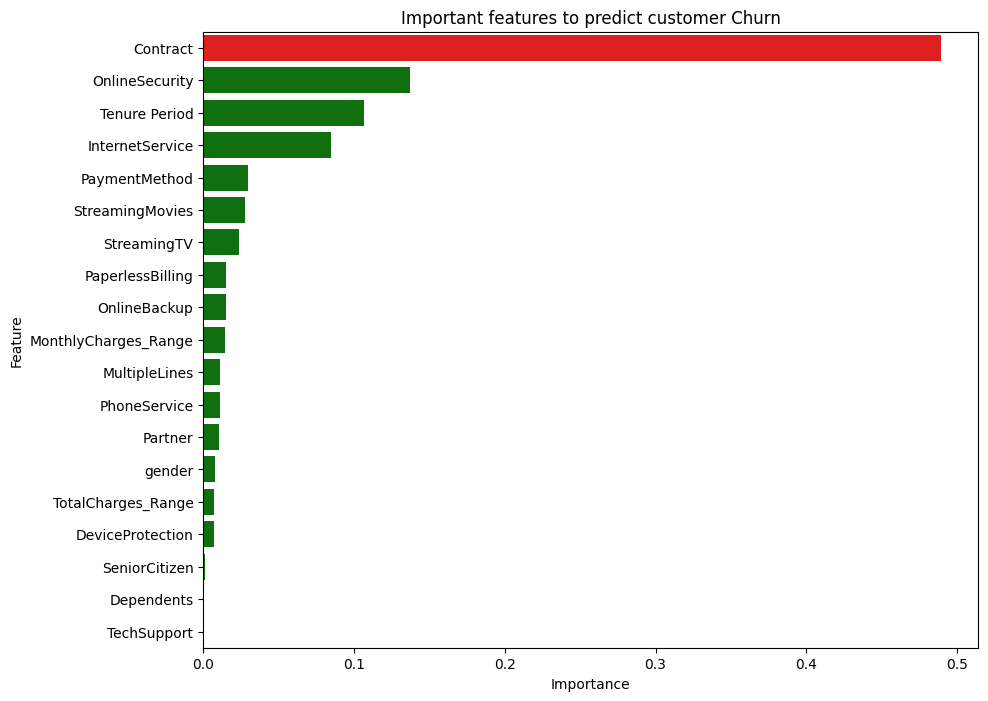

In [105]:
#visualize the relative importance using Seaborn
values = feat_df.Importance
idx = feat_df.Feature
plt.figure(figsize=(10,8))

clrs = ['green' if (x < max(values)) else 'red' for x in values ]
sns.barplot(y=idx,x=values,palette=clrs).set(title='Important features to predict customer Churn')
plt.show()